In [3]:
#ライブラり
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [88]:
make_forge = mglearn.datasets.make_forge()

(26, 2)

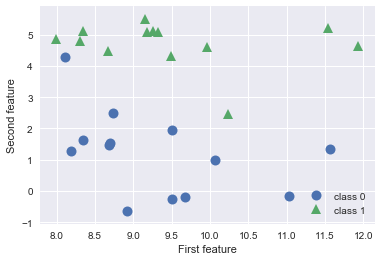

In [89]:
X, y = mglearn.datasets.make_forge()
#データセットをプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
X.shape

In [90]:
print(X.shape)
print(y.shape)

(26, 2)
(26,)


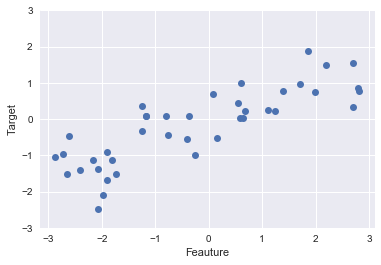

In [91]:
# サンプル数40
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feauture")
plt.ylabel("Target")

In [92]:
print(X.shape)
print(y.shape)

(40, 1)
(40,)


# Cancer Data

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['DESCR', 'target', 'data', 'target_names', 'feature_names'])

In [6]:
def get_target_names(x):
    if x == 0:
        return "malignant"
    if x == 1:
        return "benign"

In [7]:
cancer_data = pd.DataFrame(columns=cancer['feature_names'],data = cancer['data'])
cancer_data['target'] = cancer['target']
cancer_data["target_names"] = cancer_data['target'].apply(lambda x : get_target_names(x))
cancer_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [8]:
cancer_data.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_names'],
      dtype='object')

In [9]:
len(cancer_data.keys())

32

In [10]:
X = cancer_data.iloc[:,0:30]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y = cancer_data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# ランダムフォレスト(個人学習)
```
良性か悪性かランダムフォレストで分類を行う
```

In [12]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
# n_estimators
forest.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on  test set:{:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set:0.991
Accuracy on  test set:0.958


# 重要なパラメータを探索
```
個人学習 20180601
```

In [13]:
def plot_feature_importances(model, X):
    #columns count
    n_features = X.shape[1]
    # model.feature_importances_:説明変数の重要度を付与
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # Y軸設定
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [14]:
print(forest.feature_importances_[0],)

0.003852779450130444


In [15]:
n_features = X.shape[1]
print(range(n_features))

range(0, 30)


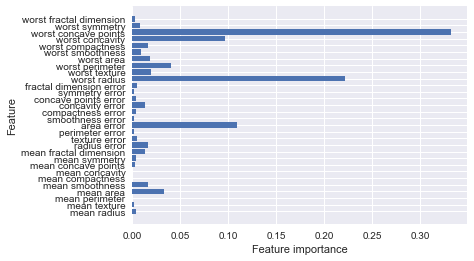

In [16]:
plot_feature_importances(forest, X)

```
気づき
説明変数：worst symmetry, area error , worst radiusが重要
説明変数3つでランダムフォレストを実施する。
```

# 重要なパラメータでモデルを構築
```
個人学習 20180601
```

In [41]:
# 説明変数ごとの重要度を表示
def get_feature_importances(model, X):
    feature_importances = pd.DataFrame()
    feature =   X.keys()
    importances = model.feature_importances_
    feature_importances['feature'] = feature
    feature_importances['importance'] = importances
    return feature_importances

In [42]:
df_feature_importances = get_feature_importances(forest, X)
df_feature_importances_sort = df_feature_importances.sort_values(by='importance',ascending=False).head()
df_feature_importances_sort.head()

,feature,importance
1,worst radius,0.528233
0,worst concave points,0.210271
2,area error,0.189076
3,worst concavity,0.072420


In [43]:
columns = ['worst concave points','worst radius', 'area error','worst concavity']
X = cancer_data[columns]
X.head()

,worst concave points,worst radius,area error,worst concavity
0,0.2654,25.38,153.40,0.7119
1,0.1860,24.99,74.08,0.2416
2,0.2430,23.57,94.03,0.4504
3,0.2575,14.91,27.23,0.6869
4,0.1625,22.54,94.44,0.4000


In [44]:
y = cancer_data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [45]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=42)
# n_estimators
forest.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on  test set:{:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set:0.993
Accuracy on  test set:0.958


# 最適な説明変数の組み合わせを網羅的に実施
```
重要度(高)のみ構築するモデル
前提：重要度の高い特徴量はモデルの精度を良くする

下記モデルを構築し最適なパラメータを探索する。
 説明変数1
 説明変数1,2
 説明変数1,2,3
 説明変数1,2,3,4
 説明変数1,2,3,4,5
 説明変数2
 説明変数2,3
 説明変数2,3,4
 説明変数2,3,4,5
 説明変数3
 説明変数3,4
 説明変数3,4,5
 説明変数4
 説明変数4,5
 ```

In [107]:
df_feature_importances_sort.head()

,feature,importance
27,worst concave points,0.332154
20,worst radius,0.221906
13,area error,0.109425
26,worst concavity,0.096559
22,worst perimeter,0.040497


In [108]:
df_feature_importances_sort.feature.iloc[0:]

27    worst concave points
20            worst radius
13              area error
26         worst concavity
22         worst perimeter
Name: feature, dtype: object

# 確認事項
```
個人学習20180602
・重要度の高いパラメータを活用した方が精度が高い
・上位いくつまで使うのが良いか確かめる
```

In [40]:
# レコード分実施
best_score = 0
for i in range(5):
    feature = df_feature_importances_sort.feature.iloc[0:i+1]
    X_importances = X[feature]
    X_train, X_test, y_train, y_test = train_test_split(X_importances,y,random_state=42)
    forest = RandomForestClassifier(n_estimators=5, random_state=42)
    forest.fit(X_train,y_train)
    if forest.score(X_test,y_test) > best_score:
        best_score = forest.score(X_test,y_test)
        best_feature = feature
        best_train_score = forest.score(X_train,y_train)
        best_test_score = forest.score(X_test,y_test)
print("best score：{}".format(best_score))
print("best feature：\n{}".format(best_feature))
print("best train score:{:.3f}".format(best_train_score))
print("best test score:{:.3f}".format(best_test_score))

best score：0.9440559440559441
best feature：
1            worst radius
0    worst concave points
2              area error
Name: feature, dtype: object
best train score:0.991
best test score:0.944


```
気づき
分類において重要なパラメータを選別したところ予測精度が向上した。
重要予測モデルにおいて余分な説明変数は排除した方が精度が向上するようだ。
決定木の数を減らすことでより、顕著に効果がわかるようになった。
n_estimators=5 [何もしない]
Accuracy on training set:0.991
Accuracy on  test set:0.958
n_estimators=5 [重要なパラメータのみ選択]
best train score:0.99
best test score:0.97

適合不足でもなく、過学習でもない最適なパラメータを探す
ーーーーーーーーーーーーーーーーーーーーーーーーーー
ランダムフォレスト：
調整すべきパラメータ
n_estimatorsとmax_feature,ma_depthなど事前枝切りパラメータ
n_estimatorsは大きければ大きいほど良くなる。
```

In [110]:
# 決定木・ランダムフォレストで説明変数の重要度を表示
forest.feature_importances_

array([0.48624414, 0.28802103, 0.05382704, 0.14567688, 0.02623091])

In [111]:
X_train.keys()

Index(['worst concave points', 'worst radius', 'area error', 'worst concavity',
       'worst perimeter'],
      dtype='object')

```
気づき：
今回分類の粒度以外にもどの説名変数が最も効果があるのかも
探索できるようになる必要がある。
グリッドサーチだけでできるのだろうか？
```

# グリッドサーチ(個人学習)
```
ランダムフォレストでグリッドサーチを行う

```

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# パラメータ / 決定木の数を調整
param_grid = {'n_estimators':[1,5,10,15,20,25,30,35,40,100]}

# GridSearch instance
clf = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv = 5
)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
clf.fit(X_train, y_train)
print("test set score:{:.2f}".format(clf.score(X_test, y_test)))
print("best params:{}".format(clf.best_params_))
print("best cross_validation score:{:.2f}".format(clf.best_score_))

test set score:0.94
best params:{'n_estimators': 10}
best cross_validation score:0.94


In [113]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

NameError: name 'tree' is not defined

```
気づき
決定木の分岐は5区切りだと15が最適であることが分かる。
```

# ロジスティック回帰
```
ロジスティック回帰で分類を行い、
ランダムフォレストとモデルの精度の検証を実施する。
```

```
後の予測モデルで予測問題を解いた方がいい
```

In [114]:
print("benign：" + str(len(a[a['target_names'] == "benign"])))
print("malignant：" + str(len(a[a['target_names'] == "malignant"])))
print(cancer.data.shape)

NameError: name 'a' is not defined

In [115]:
print("sample counts per class:\n{}".format({
    n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
}))

sample counts per class:
{'malignant': 212, 'benign': 357}


In [116]:
#個々の特徴量の意味を示す記述
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# boston data
```
個人学習  20180603
boston　dataを活用して線形回帰による予測と
ハイパーパラメータの探索を行う。

```

In [117]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:{}".format(boston.data.shape))
print(boston.keys())
print(boston['feature_names'])

Data shape:(506, 13)
dict_keys(['target', 'data', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [118]:
def get_target_names(x):
    if x == 0:
        return "malignant"
    if x == 1:
        return "benign"

In [119]:
boston_df = pd.DataFrame(columns=boston['feature_names'],data = boston['data'])
boston_df['target'] = boston['target']                     

In [120]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 線形回帰
```
個人学習 20180604
相関係数の絶対値の高いパラメータを
活用して、最適なパラメータの探索を行う。
```

In [122]:
corr_params = boston_corr_params
corr_params

NameError: name 'boston_corr_params' is not defined

In [123]:
def get_feature_importances_corr(X, get_type):
    feature_importances_corr = pd.DataFrame()
    X_corr = X.corr()['target']
    if get_type == 1:
        #絶対値の大きい順
        Abvalue = np.fabs(X_corr).sort_values(ascending=False)
        Abvalue = Abvalue[Abvalue.keys() != 'target']
        feature =   Abvalue.keys()
        importances = Abvalue.values
    if get_type == 2:
        #正の相関係数のみ
        param_positive = X_corr[(X_corr > 0) & (X_corr.keys() != 'target')].sort_values(ascending=False)
        feature = param_positive.keys()
        importances = param_positive.values
    if get_type == 3:
        #正の相関係数降順
        param_positive_order = X_corr[X_corr.keys() != 'target'].sort_values(ascending=False)
        feature = param_positive_order.keys()
        importances = param_positive_order.values
    feature_importances_corr['feature'] = feature
    feature_importances_corr['importance'] = importances
    return feature_importances_corr

In [132]:
# targetと相関係数の絶対値が大きい値を取得
feature_importances_corr_abvalue = get_feature_importances_corr(boston_df,get_type=1)
feature_importances_corr_abvalue.head()

,feature,importance
0,LSTAT,0.737663
1,RM,0.695360
2,PTRATIO,0.507787
3,INDUS,0.483725
4,TAX,0.468536


In [133]:
feature_importances_corr_abvalue["feature"]

0       LSTAT
1          RM
2     PTRATIO
3       INDUS
4         TAX
5         NOX
6        CRIM
7         RAD
8         AGE
9          ZN
10          B
11        DIS
12       CHAS
Name: feature, dtype: object

In [134]:
feature_importances_corr_abvalue["importance"]

0     0.737663
1     0.695360
2     0.507787
3     0.483725
4     0.468536
5     0.427321
6     0.385832
7     0.381626
8     0.376955
9     0.360445
10    0.333461
11    0.249929
12    0.175260
Name: importance, dtype: float64

# 相関係数の絶対値大回帰分析
```
個人学習20180605
```

In [135]:
from sklearn.linear_model import LinearRegression
X = boston_df[feature_importances_corr_abvalue["feature"]]
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X ,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("train score:{:.3f}".format(lr.score(X_train,y_train)))
print("test score：{:.3f}".format(lr.score(X_test,y_test)))

train score:0.748
test score：0.684


In [136]:
X = boston_df[feature_importances_corr_abvalue["feature"]]
print(X.keys())
print(len(X.keys()))

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN', 'B', 'DIS', 'CHAS'],
      dtype='object')
13


In [138]:
# 最適な説明変数数を探索
X = boston_df[feature_importances_corr_abvalue["feature"]]
y = boston_df["target"]

best_score = 0
for i in range(len(feature_importances_corr_abvalue)):
    # feature 1 12 123
    X_importances = X.iloc[:,0:i+1]
    X_train, X_test, y_train, y_test = train_test_split(X_importances,y,random_state=42)
    lr = LinearRegression().fit(X_train,y_train)
    print("test score process:{:.3f}".format(lr.score(X_test,y_test)))
    if lr.score(X_test,y_test) > best_score:
        best_score = lr.score(X_test,y_test)
        best_feature = X_importances.keys()
        best_train_score = lr.score(X_train,y_train)
        best_test_score = lr.score(X_test,y_test)
print("best score：{}".format(best_score))
print("best feature：\n{}".format(best_feature))
print("best feature length：\n{}".format(len(best_feature)))
print("best train score:{:.3f}".format(best_train_score))
print("best test score:{:.3f}".format(best_test_score))

test score process:0.493
test score process:0.578
test score process:0.633
test score process:0.631
test score process:0.627
test score process:0.628
test score process:0.623
test score process:0.651
test score process:0.661
test score process:0.657
test score process:0.634
test score process:0.679
test score process:0.684
best score：0.6839557243179428
best feature：
Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE',
       'ZN', 'B', 'DIS', 'CHAS'],
      dtype='object')
best feature length：
13
best train score:0.748
best test score:0.684


```
気づき
boston dataに関してはすべてのパラメータを活用した方がいいことが
わかる。現在ホールドアウトで標本を分割させているので
交差検証を用いて最適なパラメータの探索を行う。
```

# 相関係数の絶対値が低い順にモデルを構築
```
個人学習20180605
```

In [139]:
# 相関係数の絶対値が低い順にモデルを構築

X = boston_df[feature_importances_corr_abvalue["feature"].sort_values(ascending=False)]
y = boston_df["target"]

best_score = 0
for i in range(len(feature_importances_corr_abvalue)):
    # feature 1 12 123
    X_importances = X.iloc[:,0:i+1]
    X_train, X_test, y_train, y_test = train_test_split(X_importances,y,random_state=42)
    lr = LinearRegression().fit(X_train,y_train)
    print("train score process:{:.3f}".format(lr.score(X_train,y_train)))
    print("test score process:{:.3f}".format(lr.score(X_test,y_test)))
    print("\n")
    if lr.score(X_test,y_test) > best_score:
        best_score = lr.score(X_test,y_test)
        best_feature = X_importances.keys()
        best_train_score = lr.score(X_train,y_train)
        best_test_score = lr.score(X_test,y_test)
print("---------------------------------------------------")
print("best score：{}".format(best_score))
print("best feature：\n{}".format(best_feature))
print("best feature length：\n{}".format(len(best_feature)))
print("best train score:{:.3f}".format(best_train_score))
print("best test score:{:.3f}".format(best_test_score))

train score process:0.103
test score process:0.200


train score process:0.242
test score process:0.349


train score process:0.576
test score process:0.520


train score process:0.576
test score process:0.521


train score process:0.604
test score process:0.562


train score process:0.617
test score process:0.567


train score process:0.694
test score process:0.642


train score process:0.697
test score process:0.646


train score process:0.720
test score process:0.704


train score process:0.729
test score process:0.707


train score process:0.736
test score process:0.710


train score process:0.748
test score process:0.687


train score process:0.748
test score process:0.684


---------------------------------------------------
best score：0.7096265481958812
best feature：
Index(['ZN', 'TAX', 'RM', 'RAD', 'PTRATIO', 'NOX', 'LSTAT', 'INDUS', 'DIS',
       'CRIM', 'CHAS'],
      dtype='object')
best feature length：
11
best train score:0.736
best test score:0.710


```
気づき
相関係数の低い説明変数からテストスコアを算出すると
スコアが低いことが確認できる。
しかし、プロセスを確認すると相関係数の絶対値が大きいものが
best score にはならないことが確認できる。
予測精度を下げているようだ。
相関係数の絶対値ではなく、正の相関、負の相関でテストスコアの結果が異なるの
だろうか。
最後の2つの説明変数を活用すると過学習になってしまっている。
```

# 最適なモデル
```
20180611
```

In [145]:
X = boston_df[feature_importances_corr_abvalue["feature"].sort_values(ascending=False)]
y = boston_df["target"]

best_score = 0
for i in range(len(feature_importances_corr_abvalue)):
    X_importances = X.iloc[:,0:i+1]
    X_train, X_test, y_train, y_test = train_test_split(X_importances,y,random_state=42)
    lr = LinearRegression().fit(X_train,y_train)
    if lr.score(X_test,y_test) > best_score:
        best_score = lr.score(X_test,y_test)
        best_feature = X_importances.keys()
        best_train_score = lr.score(X_train,y_train)
        best_test_score = lr.score(X_test,y_test)
print("---------------------------------------------------")
print("best score：{}".format(best_score))
print("best feature：\n{}".format(best_feature))
print("best feature length：\n{}".format(len(best_feature)))
print("best train score:{:.3f}".format(best_train_score))
print("best test score:{:.3f}".format(best_test_score))

---------------------------------------------------
best score：0.7096265481958812
best feature：
Index(['ZN', 'TAX', 'RM', 'RAD', 'PTRATIO', 'NOX', 'LSTAT', 'INDUS', 'DIS',
       'CRIM', 'CHAS'],
      dtype='object')
best feature length：
11
best train score:0.736
best test score:0.710


# 変数選択[個人学習 20180701]
```
モデルに用いる説明変数を選ぶ作業のことを、変数選択と呼ぶ。
変数選択をするためには、様々な変数の組み合わせでモデルを構築します。
例えば説明変数A,B,Cの3つがあった場合、以下の説明変数の組み合わせが考えられます。

説明変数
・なし
・A
・B
・C
・A+B
・A+C
・B+C
・A+B+C
これらのありうる変数の組み合わせから最も"良い"変数の組み合わせを持ったモデルを選ぶのが変数選択です。
最も"良い"変数の組み合わせを選ぶには、大きく2つ、統計的仮説検定を用いる方法と情報量基準を用いる方法があります。
```

# 検定による変数選択
```
統計的仮説検定を用いる場合は以下の仮説を立てます。
帰無仮説：説明変数の係数β1は0である。
対立仮説：説明変数の係数β1は0と異なる。
帰無仮説が棄却された場合には、気温にかかる係数が0でないと判断されるので、係数は目的変数の予測に影響を与えている。つまり、「モデルにに気温という説明変数は必要だ」と判断されます。
帰無仮説が棄却できない場合には「モデルは単純な方が良い」とい原則に基づいて、変数β1をモデルから取り除きます。
過学習をを引き起こしてしまう原因は、説明変数を増やしすぎてしまうことです。不要な説明変数を取り除くことで予測精度が向上する可能性があります。
```

# 情報量基準による変数選択
```
情報量基準は推定されたモデルの"良さ"を定量化した指標である。赤池の情報量基準[AIC]などが使われます。
AICは小さければ小さいほど"良いモデル"だと判断されます。
そこであらゆる変数の組み合わせでモデルを構築し、各モデルのAICを比較します。AICが最も小さくなったモデルを採用とすることで変数選択を実行します。
p273参照
```

# モデルの評価
```
推定されたモデルを無条件で信じるのは危険なので下記の観点で評価します、
1.予測精度の評価
→　高い方がこのましい予測である
2.前提条件が満たせれているか
→　モデルの前提条件が満たされているなら、売り上げの予測値と実測値の差が平均0の正規分布に従ってるはず。
```

# K-最近傍法

In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("X Shape:{}".format(X.shape))

X Shape:(506, 104)


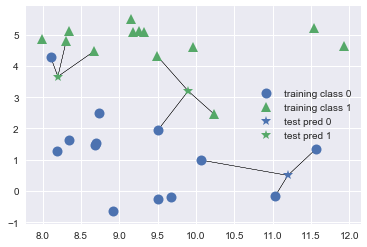

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


# グリッドサーチ(個人学習)
```
5章で学んだグリッドサーチを活用しハイパーパラメータの探索を行う
```

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# パラメータ
param_grid = {'n_neighbors':[1,2,3,4,5,6]}

# GridSearch instance
clf = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5)

X,y = mglearn.datasets.make_forge()
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 交差検証を実行
clf.fit(X_train, y_train)
print("test set score:{:.2f}".format(clf.score(X_test, y_test)))
print("best params:{}".format(clf.best_params_))
print("best cross_validation score:{:.2f}".format(clf.best_score_))

test set score:0.86
best params:{'n_neighbors': 3}
best cross_validation score:0.95


#  KNeighborsClassifierの解析

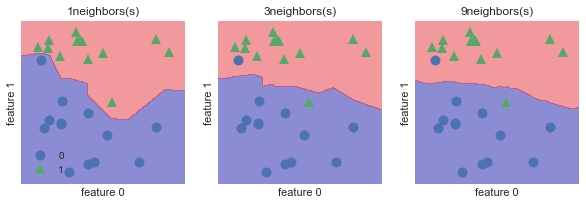

In [17]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

# 近傍数を1,3,9と変化させる。
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True,eps=0.5, ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)  

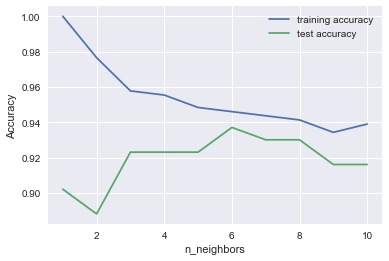

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data ,cancer.target, stratify=cancer.target,random_state=66)
training_accuracy = []
test_accuracy = []
#n_neighborsを1~10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data ,cancer.target, stratify=cancer.target,random_state=66)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
print("train set accuracy:{:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

train set accuracy:0.96
Test set accuracy:0.92


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data ,cancer.target, stratify=cancer.target,random_state=66)
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
clf.predict(X_test)
print("train set accuracy:{:.2f}".format(clf.score(X_train, y_train)))
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

train set accuracy:0.95
Test set accuracy:0.94


```
気づき
近傍数が少ない(1)とか学習となり、
近傍数が多いと(10)モデルがシンプルになりすぎて性能は低下する。
最良の性能はどのあたりか？6のあたりにある。
```

# k-近傍回帰

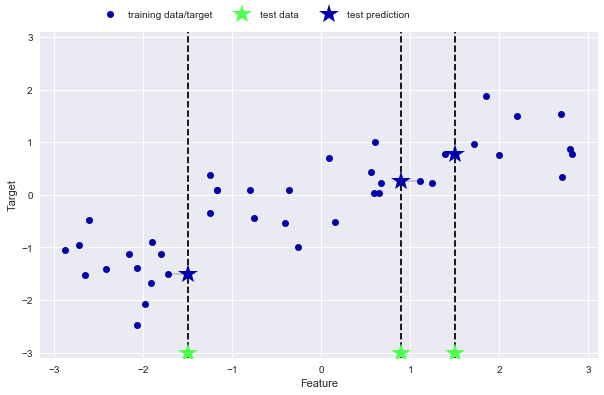

In [67]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

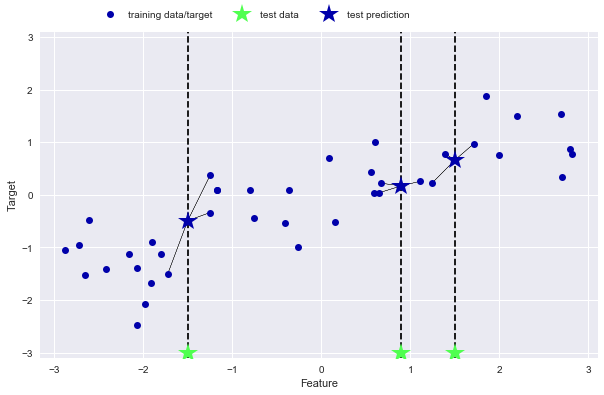

In [68]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [48]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)

#3つ最近傍を考慮したモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [49]:
print("test set predictions：\n{}".format(reg.predict(X_test)))

test set predictions：
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [50]:
print("test set R2:{:.2f}".format(reg.score(X_test,y_test))) 

test set R2:0.83


```
scoreメソッドを用いてモデルを評価する。
回帰モデルの予測の正確性を図るためのもので0から1までとる
```

# KNeighborsRegressorの解析

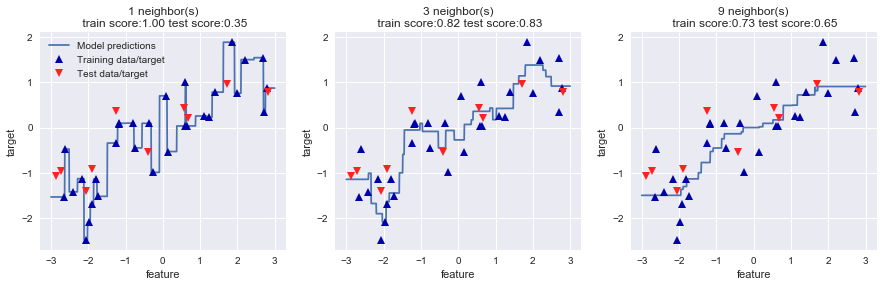

In [51]:
flg, axes = plt.subplots(1,3,figsize=(15,4))

"""
np.linspace：等差数列を作る関数。ex 5,7,9 パラメータ np.linspace(start,end,num(要素数))
np.reshape(-1,1)：-1を渡した場合は、行ベクトルになります。この場合は、列サイズが元の形状から推測されて決定されます。列数だけが1で決まる
"""
#-3から3までの間に1,000点のデータポイントを作る
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    #学習
    reg.fit(X_train,y_train)
    #作成したデータの予測
    ax.plot(line, reg.predict(line))
    #実際の値
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1), markersize=8)
    
    #凡例
    ax.set_title("{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(
        n_neighbors,reg.score(X_train,y_train),
        reg.score(X_test,y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
#点の説明
axes[0].legend(["Model predictions","Training data/target", "Test data/target"],loc="best")

```
1最近傍点の回帰だと、明らかに訓練データの影響を受けており、
予測精度が低い。
3近傍点だとちょうどよく、9だと予測精度含め下がっている


KNeighborsの分類器には2つの重要なパラメータがある。
近傍点の数とデータポイント間の距離測度である。
(距離においてはデフォルトだとユークリッド距離をとる)

メリット：
モデルの理解のしやすさ

デメリット：
処理速度が遅く多数の特徴量を扱うことができない
```

# 線形モデル

w[0]: 0.393906  b: -0.031804


/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


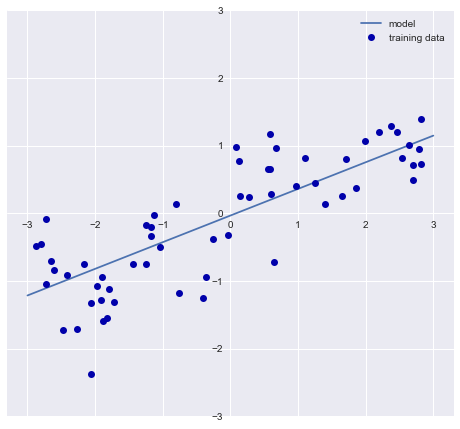

In [52]:
mglearn.plots.plot_linear_regression_wave()

In [53]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [54]:
print("傾き：{}".format(lr.coef_))

傾き：[ 0.39390555]


In [55]:
print("切片：{}".format(lr.intercept_))

切片：-0.031804343026759746


In [56]:
print("Train score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Train score:0.67
Test set score:0.66


# 交差検証 (個人学習)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X,y = mglearn.datasets.make_wave(n_samples=60)

logreg = LinearRegression()
scores = cross_val_score(logreg, X, y,cv=5)
scores.mean()

0.62398018977083525

In [38]:
X ,y = mglearn.datasets.make_wave(n_samples=60)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,y,random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval,y_trainval,random_state=0)

logreg = LinearRegression().fit(X_train,y_train)
print(logreg.score(X_valid , y_valid))
print(logreg.score(X_test , y_test))

0.662879903536
0.688914732076


In [79]:
#特徴量は1つ
X.shape

(60, 1)

```
R2が0.66とあまり高くはないが、訓練セットとテストセットに対する値が非常に近い。
これは適合不足であって、過剰適合ではないことを意味する。
このような1次元データセットではモデルがとても単純で、過剰適合の危険性は少ない。
しかし、高次元のデータセットに対しては(つまりデータセットが多くの特徴量を持つ場合は)線形モデルはより
強力になるので過剰適合の危険性が高くなる。
次に104のデータセットを持つデータセットを使ってみる
```

In [80]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)
print("Train score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test score:{:.2f}".format(lr.score(X_test,y_test)))

Train score:0.95
Test score:0.61


# グリッドサーチ(個人学習)

```
訓練セットとテストセットを比較すると
訓練データに対しては非常に性格だが
テストデータに関しては精度が低いことが確認できる。
このように、訓練データとテストデータで性能が大きく
異なるのは過剰適合が起きているからだ。
したがって、複雑度を制御できうるモデルを探さなければならない。
標準的な線形回帰に変わる一般的な手法をリッジ回帰と呼ぶ
```

# リッジ回帰
```
リッジ回帰は線形モデルによる回帰の1つ。予測に用いられる式は通常の最小二乗法と同じ。
しかし、リッジ回帰では係数(w)を訓練データに対する予測ではなく、他の制約に対しても最適化する。
直感的には予測をうまく行いつつ、ここの特徴量が出力に与える影響をなるべく小さくしたい。
正規化、つまり過剰適合を防ぐために明示的にモデルを制約することである。
```

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set scoer:{:.2f}".format(ridge.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge.score(X_test,y_test)))

training set scoer:0.89
test set score:0.75


```
見てわかるように、Ridgeの訓練セットに対するスコア(0.89)はLinearRegressionの場合(0.95)より低く、
テストスコアに対するスコア(0.75)はLinearRegressionより高く(0.61)なっていることが確認できる。
R位dげは強い制約モデルなので過剰適合の危険は少ない。複雑度の低いモデルは訓練セットに対する性能は低いが汎化性能は高い。
興味があるのは汎化性能のみなので、LinearRegressionよりもRidgeモデルを活用した方が良いことが確認できる。
```

```
Ridgeモデルではモデルの簡潔さ(0に近い係数の和)と訓練セットに対する性能がトレードオフの関係になる。
このどちらにおもきをおくかわ、ユーザーがalphaパラメータを用いて指定することができる。
alphaを増やすと係数はより0に近くなり、訓練セットに対する性能は低下するが、汎化にはそちらの方が良いかもしれない

```

In [29]:
ridge10 = Ridge(alpha=0).fit(X_train,y_train)
print("training set score;{:.2f}".format(ridge10.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

training set score;0.95
test set score:0.61


/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.848504238352562e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [30]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("training set score;{:.2f}".format(ridge01.score(X_train,y_train)))
print("test set score:{:.2f}".format(ridge01.score(X_test,y_test)))

training set score;0.93
test set score:0.77


```
alphaパラメータのモデルへの影響を定量的に知るには、様々なalphaに対するモデルのcoef_属性を確認すると良い。
alphaが大きくなるとモデルがより制約されるのでalphaが大きい場合は小さい場合よりもcoef_要素の絶対値が小さくなる
ことが期待される。
```

NameError: name 'lr' is not defined

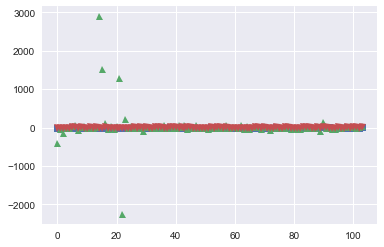

In [31]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")
plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient indes")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

```
様々なalphaによるリッジ回帰と、線形回帰に対する係数の大きさの比較を行う。

```

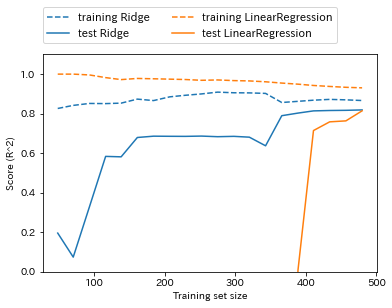

In [47]:
mglearn.plots.plot_ridge_n_samples()

```
リッジ回帰でも線形回帰でも、訓練スコアはすべてのデータサイズにおいて、
テストスコアよりも高い。
リッジ回帰では正規化が行われているため、訓練スコアは線形回帰よりも常に低い。
しかし、テストスコアはリッジ回帰の方が良い。特にデータサイズが小さい時はより顕著だ。
400データポイント以下では線形回帰は何も学習することができていない。データが増えれば増えるほど双方のモデルの性能は向上し、最後には線形回帰が追いつく。
ここからわかることは、十分な訓練データがある場合には正規化はあまり重要ではなくなるということである。
十分なデータがある場合、リッジ回帰と線形回帰は同じ性能を示す。
また、線形回帰では訓練性能が低下していることが理解できる。
データ量が多くなるとモデルが過剰適合すること、もしくはデータを覚えてしまうことが難しくなるので。
```

# Lasso
```
リッジ回帰と同様に、Lassoも係数が0になるように制約をかけるのだが、掛け方が少し違い、Li正規化と呼ばれる。
Li正規化の結果Lassoにおいてはいくつかの係数が完全に0になる。
これはモデルにおいていくつかの特徴量が完全に無視されるということになる。
自動的に特徴量を選択し、いくつかの係数が0になるとモデルを解釈しやすくなりどの特徴量が重要なのかが明らかになる。
```

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("Number of feature used:{}".format(np.sum(lasso.coef_ != 0 )))

Training set score:0.29
Test set score:0.21
Number of feature used:4


In [49]:
X.shape

(506, 104)

```
Lassoの性能は訓練セットに対しても、テストセットに対しても非常に悪い。
これは適合不足であることを示唆する。
さらに104の特徴量のうちわずか4つしか使ってない。
Ridgeと同様にLassoにも係数を0に向かわせるalphaがある。
適合不足の度合いを減らすにはalphaを減らせば良い。
この際、max_iter(最大の繰り返し回数)をデフォルト値から増やしてやる必要がある。

```

In [50]:
#　max_iterの値を増やしてやる
#　こうしておかないとmax_iterを増やすよう警告される。
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("Trainig set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_ != 0)))

Trainig set score:0.90
Test set score:0.77
Number of features used:33


```
alphaを小さくすると、より複雑なもいでるの適合するようになり、
訓練データに対してもテストデータに対しても良い結果が出ている。
性能はRidgeよりすこし良い程度だが、104の特徴量のうちわずか33しか使ってない。
モデルを理解しやすくなっている。
```

```
alphaを小さくしすぎると、リッジの場合と同様に正規化の効果が薄れ、過剰適合が発生し、
性能はLinearRegressionと似たようなものとなる。
```

In [51]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("Trainig set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_ != 0)))

Trainig set score:0.90
Test set score:0.77
Number of features used:33


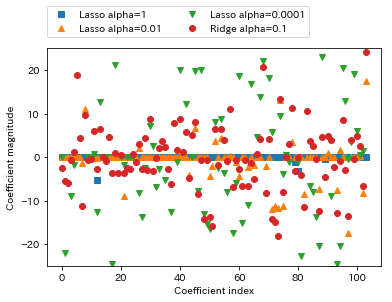

In [52]:
plt.plot(lasso.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_ ,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# クラス分類のための線形モデル

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#参考URL
# subplot(行数, 列数, プロット番号)：http://ailaby.com/matplotlib_fig/

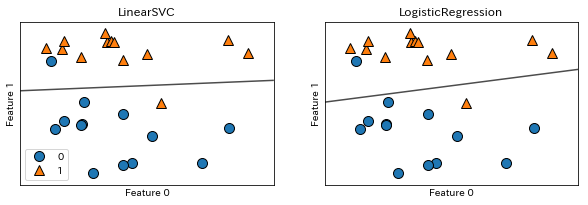

In [54]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    # 2つ _ _ 
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

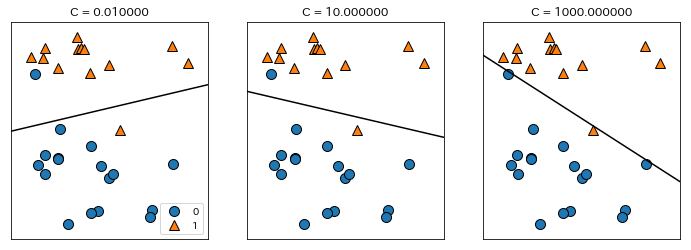

In [55]:
mglearn.plots.plot_linear_svc_regularization()

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("test set score{:.3f}".format(logreg.score(X_test,y_test)))

training set score:0.953
test set score0.958


In [57]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("test set score:{:.3f}".format(logreg100.score(X_test, y_test)))

training set score:0.979
test set score:0.965


In [58]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("test set score:{:.3f}".format(logreg001.score(X_test, y_test)))

training set score:0.934
test set score:0.930


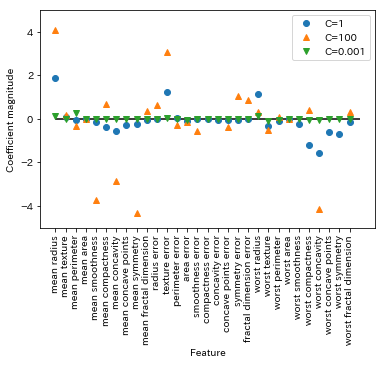

In [59]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

training accuracy of l1 logreg with C=0.001: 0.92
training accuracy of l1 logreg with C=1.000: 0.96
training accuracy of l1 logreg with C=100.000: 0.98


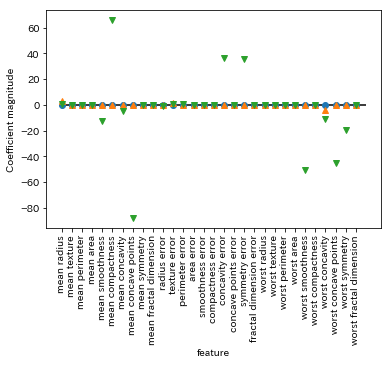

In [60]:
for C, marker in zip([0.001,1,100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("Coefficient magnitude")

# 線形モデルによる多クラス分類

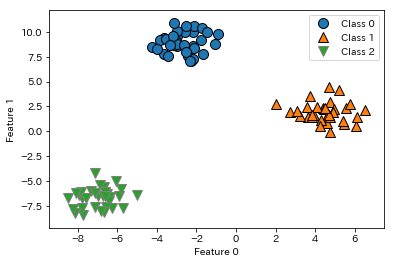

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
#Xの1列目,2列目,3列目をプロっtp
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1", "Class 2"])

In [62]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("intercept shape", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
intercept shape (3,)


In [63]:
print("Coefficient shape:", linear_svm.coef_)

Coefficient shape: [[-0.17492375  0.23141243]
 [ 0.47621922 -0.06937459]
 [-0.1891426  -0.20399677]]


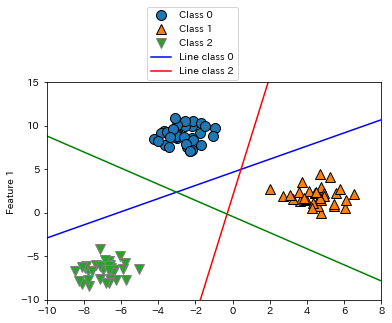

In [64]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# np.linspace()：NumPyのnp.linspaceは、線形に等間隔な数列を生成する関数
line = np.linspace(-15,15)
#切片と傾き
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.ylabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 2'], loc={1.01,0.3})




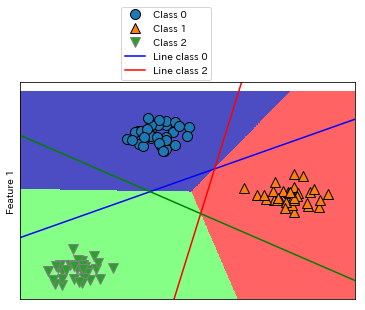

In [65]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.ylabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 2'], loc={1.01,0.3})




# ナイーブベイズ

In [66]:
X = np.array([[0,1,0,1],
            [1,0,1,1],
            [0,0,0,1],
            [1,0,1,0]])
y = np.array([0,1,0,1])

In [67]:
X.shape

(4, 4)

In [68]:
X

array([[0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 1, 0]])

In [69]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [70]:
"""
本を読んだがよく理解できなかった。。
"""

'\n本を読んだがよく理解できなかった。。\n'

# 決定木

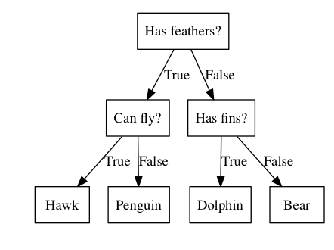

In [116]:
mglearn.plots.plot_animal_tree()

In [117]:
print(cancer.keys())

dict_keys(['feature_names', 'target', 'data', 'DESCR', 'target_names'])


In [118]:
print(cancer.data.shape)

(569, 30)


In [119]:
print(cancer.target_names)

['malignant' 'benign']


In [120]:
print(np.bincount(cancer.target))

[212 357]


In [121]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [122]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.937


# 決定木の複雑さの制御

In [123]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

accuracy on training set:0.988
accuracy on test set:0.951


# 決定木の解析

In [124]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

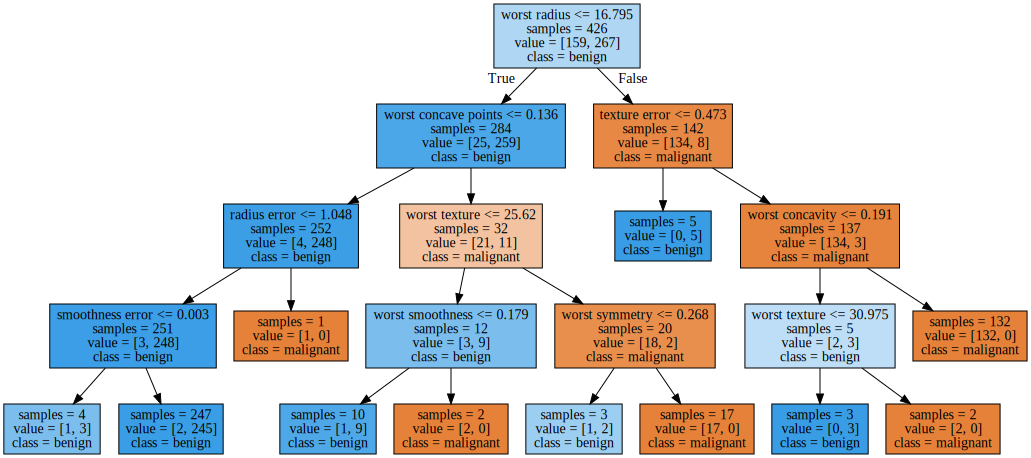

In [125]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# 決定木の特徴量の重要性

In [126]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


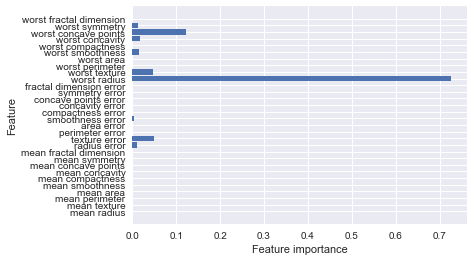

In [127]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

```
気づき：

説明変数の中で重要なパラメータを探索・可視化する。
カラムを抽出することでシンプルでより精度の高い
モデルを構築することが可能となる。
```

Feature importances: [ 0.  1.]


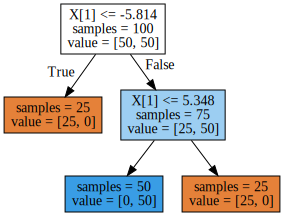

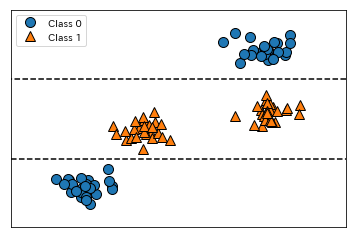

In [78]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

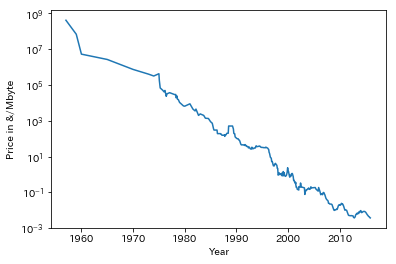

In [79]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in &/Mbyte")

In [80]:
from sklearn.tree import DecisionTreeRegressor
#過去のデータを用いて2000年以降の価格を予測する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予想
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#対数変数をキャンセルするための逆変数
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

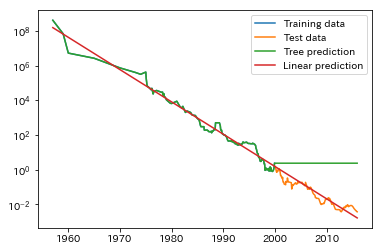

In [81]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()


# ランダムフォレスト

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

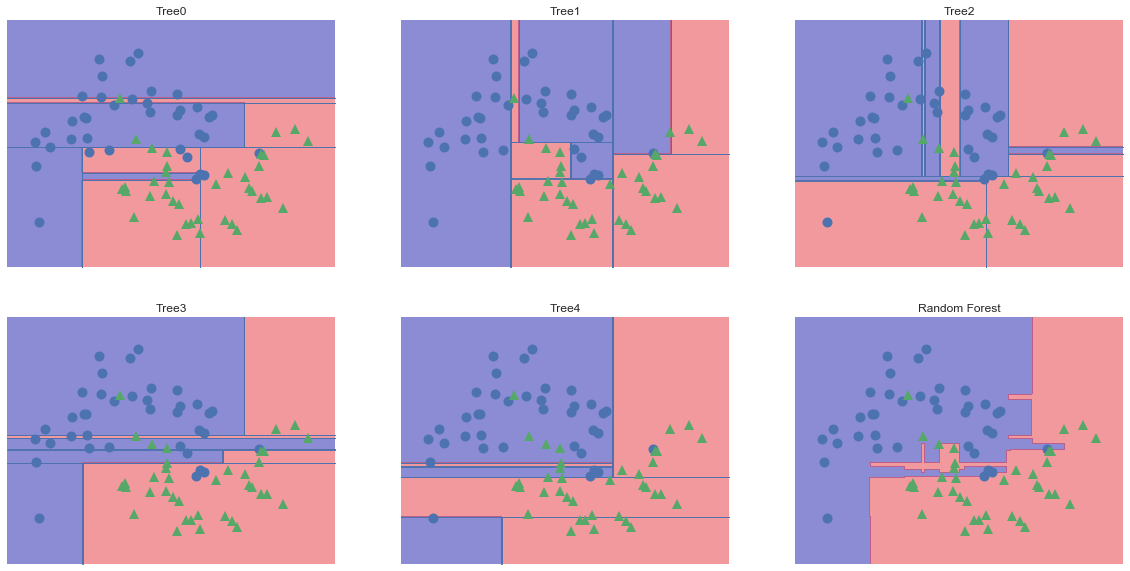

In [40]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1],
                               alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on  test set:{:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on  test set:0.972


```
ランダムフォレストはデフォルトのパラメータで十分よく機能する。


```

In [44]:
plot_feature_importances_cancer(forest)

NameError: name 'plot_feature_importances_cancer' is not defined

```
決定木と同様にランダムフォレストでも特徴量の重要度を見ることができる。
ランダムフォレストの特徴量　＝　個々の決定木の特徴量の重要度を平均したもの
個々の決定木よりも信頼できる。
1つの決定木と同様に"worest radius"の特徴量に高い重要度を与えているが、
全体としては"worst permeter"が最も高い重要度となっている。

```

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("accuracy on traing set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test))) 

accuracy on traing set:1.000
accuracy on test set:0.958


In [102]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)
print("accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

accuracy on training set:0.991
accuracy on test set:0.972


In [103]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=0.01)
gbrt.fit(X_train, y_train)
print("accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

accuracy on training set:0.627
accuracy on test set:0.629


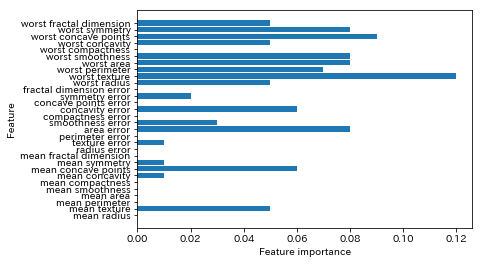

In [104]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

```
気づき：

説明変数の中で重要なパラメータを探索・可視化する。
カラムを抽出することでシンプルでより精度の高い
モデルを構築することが可能となる。
```

# サポートベクタマシン

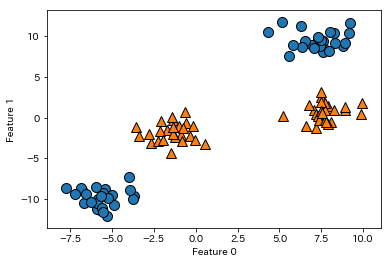

In [11]:
X,y = make_blobs(centers=4,random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

```
線形モデルによる分類では直線で分離することしかできないのでこのようなデータセットでは上手くいかない
どう切り分けても分類○と△が重なってしまっている。
```

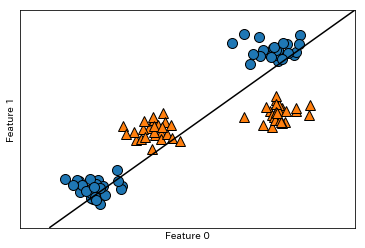

In [16]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

```
分類できない。
線形SVMで確認された決定境界

```

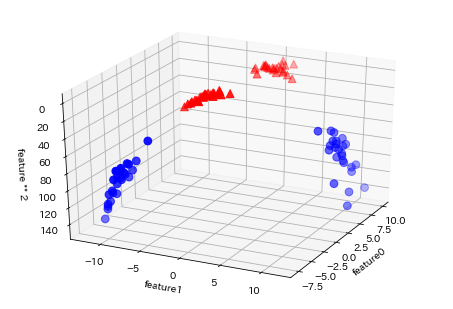

In [26]:
# 2番目の特徴量の2乗を追加
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化を行う。
ax = Axes3D(figure, elev=-152, azim=-26)
#y == 0の点をプロットしてからy==1の点をプロット
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r', marker='^',cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature ** 2")

```
入力特徴量の拡張を行う。2番目の特徴量の2乗を新しい特徴量として加える。
データポイントは2次元ではなく3次元となる
```

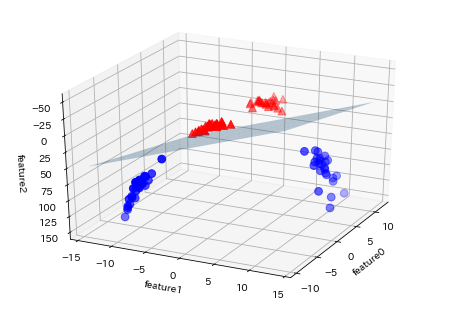

In [38]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定境界を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=- 26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1]* YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature2")

```
この新しい表現では2クラスを線形モデルで、つまり3次元空間の平面を用いて分離することが
可能となっている。
```

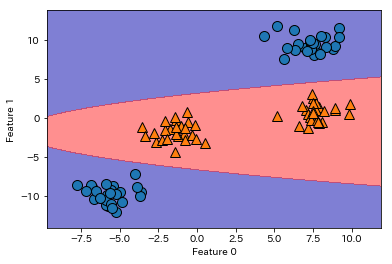

In [45]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape),levels=[dec.min(),0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

 ```
 元の特徴量の関数を確認すると、線形SVMモデルは線形ではなくなっていることを
 確認することができる。
 ```

# カーネルトリック

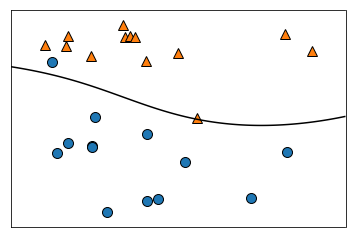

In [47]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

```
2つのクラスの境界に位置するごく一部の訓練ポイントデータだけが
決定境界を決定する。これらのデータをサポートベクタと呼ぶ。
クラス分類：サッポートベクタとの距離と訓練過程で学習された個々のサポートベクタの重要性に
よってい決定される。
SVMによる教会は非常になめらかで、非線形(直線ではない)である。
ここではCとgmmaの2つのパラメータを調整している。
パラメータ
gmm：点が近いことを意味する
C：個々のデーアポイントの重要度を制限する
```

3


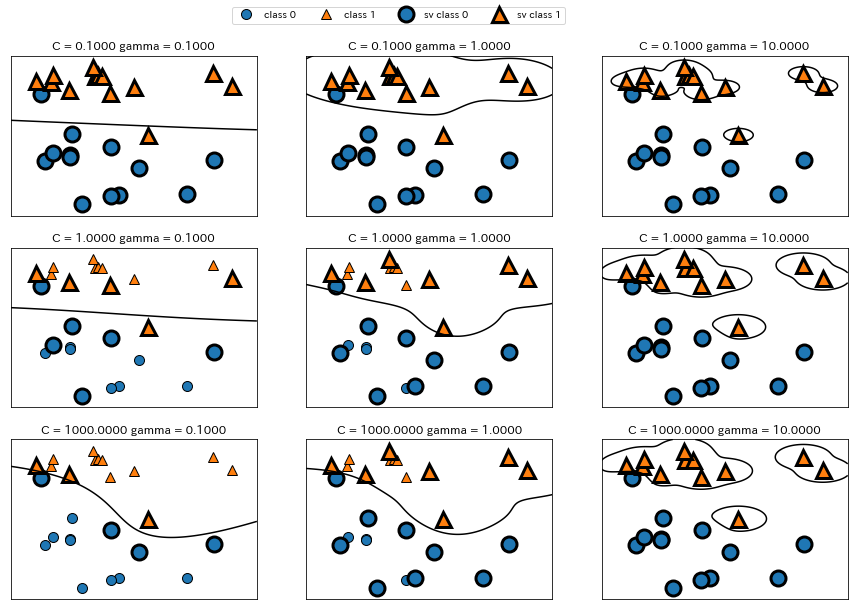

In [56]:
flg, axes = plt.subplots(3,3,figsize=(15,10))
print(len(range(-1,2)))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["class 0","class 1","sv class 0", "sv class 1"],ncol=4,loc=(.9,1.2))

```
複数のグラフを描く場合：
figureとaxesという概念が出てきます。figure は図全体、axes はその内部に用意される座標軸です。
パラメータ：gamma
左から右にパラメータgammaを0.1から10に変化させている。
gmmaが小さいとガウシアンカーネルの直径が大きくなり、多くの点を近いと判定する。
gmmaが大きいとガウシアンカーネルの直径が小さくなり、ここのデータポイントをより重視するようになる。
パラメータ：C
上から下にパラメータCを0.1から1000に変化させている。
線形モデルと同様に小さいCは制限されたモデルに対応し、ここのデータポイントの与える影響は限定される。
左上はほとんど直線である。左下は正しく分類されるよう境界線を用意している。
```

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(c.data, cancr.target, random_state=0)
